# Digit Recognition from Scratch

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras.datasets.mnist as mnist
%matplotlib inline

In [26]:
# Load dataset from Keras API
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images to shape (784, number of samples) and normalize
x_train = x_train.reshape(60000, 28 * 28).T / 255.0  # Shape (784, 60000)
x_test = x_test.reshape(10000, 28 * 28).T / 255.0  # Shape (784, 10000)

# Convert labels to 1D arrays
y_train = y_train.flatten()  # Convert to shape (60000,)
y_test = y_test.flatten()  # Convert to shape (10000,)


# Shuffle the training data
data = np.vstack((y_train, x_train))  # Stack labels and features
data = data.T  # Transpose for shuffling
np.random.shuffle(data)  # Shuffle rows
data = data.T  # Transpose back

# Split into dev and training sets
data_dev = data[:, :1000]  # First 1000 samples
y_dev = data_dev[0].reshape(1, -1)  # Extract labels
x_dev = data_dev[1:]  # Extract features

data_train = data[:, 1000:]  # Remaining samples
y_train = data_train[0].reshape(1, -1)  # Extract labels
x_train = data_train[1:]  # Extract features

# Get number of training samples
_, m_train = x_train.shape

In [8]:
x_train.shape

(784, 59000)

In [9]:
x_test.shape

(784, 10000)

In [13]:
def init_param():
    w1 = np.random.randn(10, 784) * np.sqrt(2 / 784)  # He Initialization for ReLU
    b1 = np.zeros((10, 1))  # Bias initialized to zero
    w2 = np.random.randn(10, 10) * np.sqrt(2 / 10)  # He Initialization for next layer
    b2 = np.zeros((10, 1))  # Bias initialized to zero
    return w1, b1, w2, b2

In [14]:
def ReLU(z):
    return np.maximum(0,z)

''' 
    Use np.max() when you need the largest value in an array or along an axis.
    Use np.maximum() when you need an element-wise comparison between two arrays.
'''

' \n    Use np.max() when you need the largest value in an array or along an axis.\n    Use np.maximum() when you need an element-wise comparison between two arrays.\n'

In [15]:
def deri_ReLU(z):
    return z>0

In [16]:
def SoftMax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A


In [28]:
def OneHot(Y):
    Y = Y.astype(int)  # Ensure Y is of integer type
    one_hot_Y = np.zeros((10, Y.size), dtype=int)  # Ensure dtype=int
    one_hot_Y[Y, np.arange(Y.size)] = 1  # One-hot encode
    return one_hot_Y


In [18]:
def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = SoftMax(z2)
    return z1,a1,z2,a2

In [19]:
def back_prop(z1,a1,z2,a2,w2,X,Y):
    m = Y.size
    one_hot_Y = OneHot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2)*deri_ReLU(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1,db1,dw2,db2


In [20]:
def update_param(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2

    return w1,b1,w2,b2

In [21]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/Y.size

In [30]:
def gradient_descent(X,Y,iter,alpha):
    w1,b1,w2,b2 = init_param()
    for i in range(iter):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,X)
        dw1, db1,dw2,db2 = back_prop(z1,a1,z2,a2,w2,X,Y)
        w1,b1,w2,b2 = update_param(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%50 == 0:
            print("Iteration: ",i)
            print("Accuracy: ", get_accuracy(get_predictions(a2),Y))
    return w1, b1, w2, b2

In [31]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 500, 0.10)

Iteration:  0
[0 9 3 ... 1 0 1] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.11408474576271187
Iteration:  50
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.7089322033898305
Iteration:  100
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.8245932203389831
Iteration:  150
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.8581525423728814
Iteration:  200
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.8745254237288136
Iteration:  250
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.8842372881355932
Iteration:  300
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.8901694915254237
Iteration:  350
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.8948305084745762
Iteration:  400
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.8978644067796611
Iteration:  450
[7 3 1 ... 7 4 7] [[7. 3. 1. ... 7. 4. 7.]]
Accuracy:  0.9005593220338983


In [40]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]  # Extract the image column vector
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = y_train.flatten()[index]  # Ensure it's a 1D array before indexing

    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



Prediction: [7]
Label: 7.0


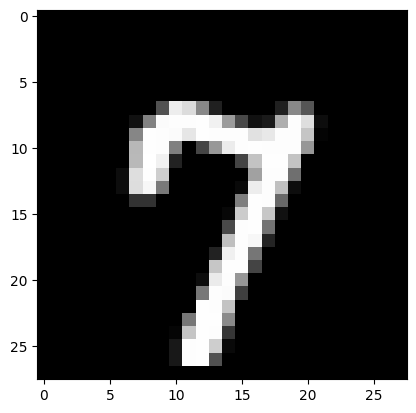

In [41]:
test_prediction(0, W1, b1, W2, b2)

Prediction: [3]
Label: 3.0


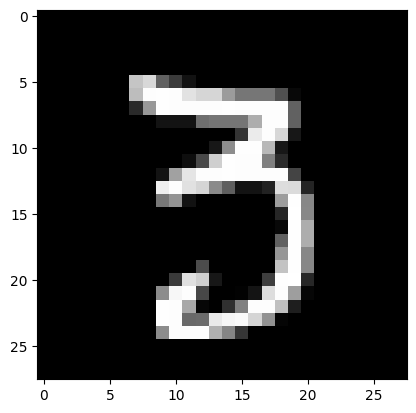

In [42]:
test_prediction(1, W1, b1, W2, b2)

Prediction: [3]
Label: 3.0


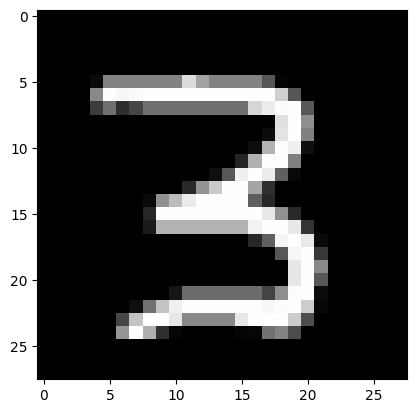

In [44]:

test_prediction(200, W1, b1, W2, b2)